# **TRABALHO DO MARCELO**


## **Instalando os pacotes necessários**
`Antes de utilizar este notebook lembre de baixar o Julia e o Jupyter corretamente em sua máquina`
<div class="alert alert-block alert-info">
<b>!!!</b> Antes de utilizar este notebook lembre de baixar o Julia e o Jupyter corretamente em sua máquina
</div>

***

`Testanto sintaxe do markdowns`

$Testantosintaxedomarkdowns$ 

$v \cdot u = v_{1}u_{1} + v_{2}u_{2}$
> Testando sintaxe do markdown
- Testando sintaxe do markdown
-  Testando sintaxe do markdown
* Testando sintaxe do markdown

***

- Testando sintaxe do markdown
    - testando sintaxe do markdown

***

1. Testando sintaxe
2. Testando sintaxe 
3. etc...

***

<div class="alert alert-block alert-danger">
<b>Testando a sintaxe do markdown</b> Testando a sintaxe do markdown
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

In [1]:
#Execute este bloco de código apenas uma vez
#FLU!!!! 
#GALO!!!
using Pkg

# Instalar pacotes
Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("PythonPlot")

┌ Warning: attempting to remove probably stale pidfile
│   path = C:\Users\vinil\.julia\registries\.pid
└ @ FileWatching.Pidfile C:\Users\vinil\.julia\juliaup\julia-1.11.1+0.x64.w64.mingw32\share\julia\stdlib\v1.11\FileWatching\src\pidfile.jl:278
    Updating registry at `C:\Users\vinil\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\vinil\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.0.4+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Inst

## Usando a PokeAPI
***
Vamos aprender a utilizar a PokeAPI. Essa API contém as informações de todos os Pokemóns. Para o nosso projeto, usaremos apenas a 1° Geração. 
Vamos extrair os nomes e status base dos Pokémons.

No exemplo abaixo, extraímos os dados dos Pokémons Pikachu e Charmander, utilizando as urls diretamente por seus nomes. 

In [2]:
#Usando a PokeAPI 
using HTTP, JSON

# URL da PokeAPI para buscar dados do Pikachu
url = "https://pokeapi.co/api/v2/pokemon/pikachu"
# URL DA PokeAPI para buscar dados do Charmander
url2 = "https://pokeapi.co/api/v2/pokemon/charmander"

# Fazer a requisição GET
response = HTTP.get(url)
response_2 = HTTP.get(url2)

# Parse do conteúdo JSON
data = JSON.parse(String(response.body))
data_2 = JSON.parse(String(response_2.body))

datas = [data, data_2]

# Exibir informações sobre o Pikachu
for x in datas
    println("Nome: ", x["name"])
    println("Altura: ", x["height"])
    println("Peso: ", x["weight"])
    println("Habilidades: ", [h["ability"]["name"] for h in x["abilities"]])

    for h in x["stats"]
        println("Status: ", h["stat"]["name"], " -> Valor Base: ", h["base_stat"])
    end
    
    println()
    
end


Nome: pikachu
Altura: 4
Peso: 60
Habilidades: ["static", "lightning-rod"]
Status: hp -> Valor Base: 35
Status: attack -> Valor Base: 55
Status: defense -> Valor Base: 40
Status: special-attack -> Valor Base: 50
Status: special-defense -> Valor Base: 50
Status: speed -> Valor Base: 90

Nome: charmander
Altura: 6
Peso: 85
Habilidades: ["blaze", "solar-power"]
Status: hp -> Valor Base: 39
Status: attack -> Valor Base: 52
Status: defense -> Valor Base: 43
Status: special-attack -> Valor Base: 60
Status: special-defense -> Valor Base: 50
Status: speed -> Valor Base: 65



## Capturando da PokeAPI os status de todos os pokemons da 1° Geração em uma matriz
***
Aqui criaremos nossa matriz principal. Ela armazenará os nomes dos 151 pokemóns originais no vetor ***NAMES_VECTOR***, ordenado pelo número do pokedéx. O vetor de status de cada um deles será uma coluna da matriz ***STATS_VECTOR***, também ordenada pelo número do pokedéx

In [3]:
using HTTP, JSON

# Função para obter informações de um Pokémon por ID
function get_pokemon_data(id::Int)
    url = "https://pokeapi.co/api/v2/pokemon/$id"
    response = HTTP.get(url)
    data = JSON.parse(String(response.body))
    return data
end

function create_pokemon_stats_matrix(qt_pkmn::Int)
    matriz_stats = zeros(6, 0)  # Matriz com 6 linhas e 0 colunas
    vetor_nomes = String[] #Matriz com os nomes dos pokemons
    
    # Adicionar colunas iterativamente na matriz
    for id in 1:qt_pkmn
        data = get_pokemon_data(id)
        nova_coluna = Int[]
        for h in data["stats"]
            push!(nova_coluna, h["base_stat"])  # Adiciona ao vetor
        end

        push!(vetor_nomes, data["name"]) #Adiciona ao vetor de nomes
        
        matriz_stats = hcat(matriz_stats, nova_coluna)
    end

    return matriz_stats , vetor_nomes
end

MOTHER_MATRIX = create_pokemon_stats_matrix(151)
STATS_MATRIX = MOTHER_MATRIX[1]
NAMES_VECTOR = MOTHER_MATRIX[2]



151-element Vector{String}:
 "bulbasaur"
 "ivysaur"
 "venusaur"
 "charmander"
 "charmeleon"
 "charizard"
 "squirtle"
 "wartortle"
 "blastoise"
 "caterpie"
 ⋮
 "snorlax"
 "articuno"
 "zapdos"
 "moltres"
 "dratini"
 "dragonair"
 "dragonite"
 "mewtwo"
 "mew"

## Definindos Funções de Algebra Linear
***
 Estamos utilizando aqui os conceitos que aprendemos em Algebra Linear Algorítmica para trabalhar com vetores e entender o quão próximos dois vetores estão sob duas métricas - Distância Angular e Distância Euclidiana. Combinaremos elas futuramente quando aplicarmos as funções no caso estudado. $ math $

   **Calculando a Distância Angular**
  
    A distância angular entre dois vetores u e v é dada pela divisão do produto interno entre eles pelo produto da norma deles. Ou seja: 

   $ D = cos(\theta) = \frac{u \cdot v}{∥u∥\cdot∥v∥} $ 

   **Calculando a Distância Euclidiana**
  
    A distância euclidiana entre dois vetores u e v é dada pela norma de u-v. Ou seja: 

   $ D = \sqrt[]{u-v} $ 


In [4]:
using LinearAlgebra

function cos_calc(v1, v2)

  return (dot(v1,v2)/(norm(v1)*norm(v2)))

end

function euclidian_dist(v1, v2)
  # ||v1-v2||

  return norm(v1-v2)
end

function calc_angle(v1, v2)
  return (((180)/pi)*(acos(cos_calc(v1, v2))))

end

v1 = [1,0,0]
v2 = [0,1,0] #Note que v2 é ortogonal em v1, e são correspondentes ao eixo X e Y em ℝ³

v3 = transpose(v2)

println(v2)
println(v3)

println(euclidian_dist(v1, v2)) #Esperado é raiz quadrada de dois 
println(cos_calc(v1, v2))
println(calc_angle(v1, v2))


[0, 1, 0]
[0 1 0]
1.4142135623730951
0.0
90.0


## Tratando da análise e manipulação  os dados extraídos
***
Agora, vamos implementar as funções do nosso código que relacionarão a Algebra Linear com os Pokémon. Essa parte do projeto implementa, entre outras coisas, funções para buscar pokemóns, obter vetores de status e calcular a proximidade de dado pokemón entre os outros. 

In [5]:
function find_pokemon_stats_by_dex_num(pokemon_ID:: Int)
    pokemon_stats = STATS_MATRIX[:, pokemon_ID] #Obtém o vetor na posição pokemon_ID
    return pokemon_stats
end

function find_pokemon_name_by_dex_num(pokemon_ID:: Int)
    pokemon_name = NAMES_VECTOR[pokemon_ID, :] #Obtém o nome do pokémon com o pokemon_ID
    return pokemon_name
end

function find_dex_num_by_name(name:: String)
   return findfirst(==(name), NAMES_VECTOR)
end

function build_pokemon_distances_vector(pokemon_ID:: Int)
    #mede a distancia entre esse pokemon com todos os outros, usa a matriz de status dos pokemons
    distances_vector = Float64[] #Matriz das distancias com 1 linha e 0 colunas
    stats_vector = find_pokemon_stats_by_dex_num(pokemon_ID)
    
    for i in 1:151
        if(i == pokemon_ID) continue
        end
            v = STATS_MATRIX[:,i] #Extrair vetor pokemon da matriz de status dos pokemons
            push!(distances_vector, (cos_calc(stats_vector, v)*euclidian_dist(stats_vector, v))) #Inserir distancia na matriz de distancias
        
    end
    return distances_vector
end 

function delete_name_from_vector(pokemon_ID:: Int, names_vector)
    deleteat!(names_vector, pokemon_ID)
end

function sort_distances(distances_vector,names_vector)
    troca = true
    
    while troca
        troca = false
        for i in 1:149
            if distances_vector[i] > distances_vector[i+1]
                # Troca os elementos no vetor de distâncias
                distances_vector[i], distances_vector[i+1] = distances_vector[i+1], distances_vector[i]
                # Troca os elementos no vetor de nomes
                names_vector[i], names_vector[i+1] = names_vector[i+1], names_vector[i]
                troca = true
            end
        end
    end
    return distances_vector, names_vector
end

#println(cos_calc(find_pokemon_stats_by_dex_num(3,STATS_MATRIX),find_pokemon_stats_by_dex_num(34,STATS_MATRIX)))    #compara a proximidade do vetor dea1  status de venusaur e nidoking

#Função que recebe o nome do pokemon e retorna um gráfico mostrando os 5 pokemons com vetor de status mais parecidos com ele

function find_5_pokemon_alike(name:: String)
    this_dex_num = find_dex_num_by_name(name)

    aux_names_vector = copy(NAMES_VECTOR)
    delete_name_from_vector(this_dex_num, aux_names_vector)

    this_distances_vector = build_pokemon_distances_vector(this_dex_num)

    sort_distances(this_distances_vector, aux_names_vector)
    
    return this_distances_vector[1:5], aux_names_vector[1:5]
end

teste = find_5_pokemon_alike("chansey")
println(teste[1])
println(teste[2])
#println(build_pokemon_distances_vector(3))


[90.67999253817123, 97.60210349561514, 98.55292622391164, 99.36489657519904, 104.11589457686831]
["krabby", "shellder", "onix", "diglett", "geodude"]


## Exibindo os resultados em um gráfico
***
Com os resultados calculados, vamos interpretar em um mapa de calor a distância dos Pokémons sugeridos para o Pokémon selecionado. 

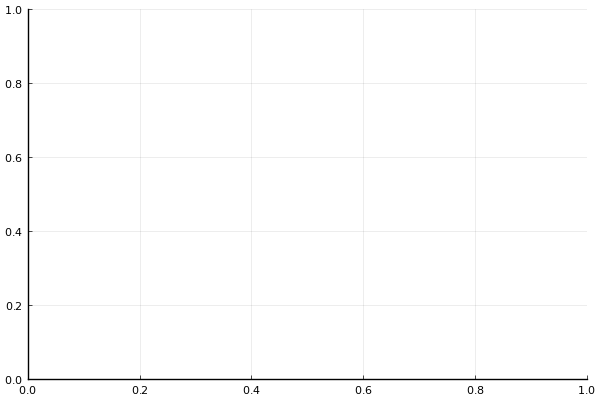

In [6]:
using Plots
pythonplot()

xs = [string("x", i) for i = 1:5]
ys = [string("y", i) for i = 1:1]
z = transpose(teste[1])
heatmap(xs, ys, z, aspect_ratio = 1)


display(plot())